# **Project: European Soccer Data Analysis in seasons 2008 : 2016**

# **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# **Introduction**

> In this project i gathered data from **[kaggle](https://www.kaggle.com/hugomathien/soccer)** and it is mysql data file that has:
>
> +25,000 matches.\
> +10,000 players.\
> 11 European Countries with their lead championship.\
> Seasons 2008 to 2016.\
> Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates.
>
>
> And in this project, I will focus on years [2010 - 2012 - 2015] as they are the most years that have data in the dataset.\
>So, we will discover this data to help us answer some curious questions. personally, I am interested in discovering them.
>
>

> ##### **Questions I will focus on in this analysis:**
>1. What is the league with the most goals all over the 3 years we focus on?
>2. During these three years, how has the level of defense of the teams changed?
>3. What helps teams win? In other words, what distinguishes the best teams?







In [ ]:
# importing lybraries used in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# **Data Wrangling**

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

con = sqlite3.connect('database.sqlite')
country = pd.read_sql_query('SELECT * FROM Country', con)
league  = pd.read_sql_query('SELECT * FROM League', con)
match   = pd.read_sql_query('SELECT * FROM Match', con)
player  = pd.read_sql_query('SELECT * FROM Player', con)
player_att = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
team = pd.read_sql_query('SELECT * FROM Team', con)
team_att = pd.read_sql_query('SELECT * FROM Team_Attributes', con)


In [ ]:
# to display all columns of the DataFrame.
pd.set_option("display.max_columns", None)

## **Data Assessing** :

>#### country dataset :

In [ ]:
print(country.head(), '\n\n')

print('null values: ', country.id.isnull().sum())
print('duplicated data: ', country.id.duplicated().sum())

In [ ]:
# view on the country table
country.info()

In [ ]:
# trying to know what are the unique values: 
if match.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### league dataset :


In [ ]:
# exploring league dataset.
print(league.head(), '\n\n')

print('null values: ', league.id.isnull().sum())
print('duplicated data: ', league.id.duplicated().sum())

In [ ]:
# view on league dataset.
league.info()

In [ ]:
# trying to know what are the unique values: 
if  league.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### match dataset :
    


In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 6)

# exploring data of the matches to check if there is duplicates, nan values.
print(match.head(), '\n\n')

print('null values: ', match.isnull().sum())
print('duplicated data: ', match.duplicated().sum())

In [ ]:
match.columns

In [ ]:
# trying to know what are the unique values: 
if match.match_api_id.duplicated().sum() == 0: 
    print('[ match_api_id ] column is unique')
else: 
    print('[ match_api_id ] column is NOT unique.')

> #### player dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring match dataset.
print(player.head(), '\n\n')

print('null values: ', player.player_api_id.isnull().sum())
print('duplicated data: ', player.player_api_id.duplicated().sum())

In [ ]:
player.info()

In [ ]:
# trying to know what are the unique values: 
if player.player_api_id.duplicated().sum() == 0: 
    print('[ player_api_id ] column is unique')
else: 
    print('[ player_api_id ] column is NOT unique.')

> #### player_attributes dataset : 

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring data of the matches to check if there is duplicates, nan values.
print(player_att.head(), '\n\n')

print('null values: ', player_att.isnull().sum().sum())
print('duplicated data: ', player_att.duplicated().sum())    

In [ ]:
player_att.info()

> #### team dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", None)

# exploring data of the matches to check if there is duplicates, nan values.
print(team.head(), '\n\n')

print('null values: ', team.isnull().sum().sum())
print('duplicated data: ', team.duplicated().sum())    

In [ ]:
team.info()

> #### team_attributes dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 0)

# exploring data of the matches to check if there is duplicates, nan values.
print(team_att.head(), '\n\n')

print('null values: ', team_att.isnull().sum().sum())
print('duplicated data: ', team_att.duplicated().sum())    

In [ ]:
# trying to know what are the unique values: 
if team.team_api_id.duplicated().sum() == 0: 
    print('[ team_api_id ] column is unique')
else: 
    print('[ team_api_id ] column is NOT unique.')

## Conclusion Of Assessing

##### Country dataset conclusion: 
> 11 rows, 2 columns.\
> No null values.  
> No duplicated rows.

> [ **id** ] column is unique ... we can use it in relations between tables.


##### league dataset conclusion: 
> 11 rows, 3 columns.\
> No null values.  
> No duplicated rows.


> [ **id** ] column is unique.

##### match dataset conclusion: 
> 25979 rows, 115 columns.\
> null values => 407395. ---- but all of them in columns we will not use.\
> duplicated rows => 0


>**Need to be cleaned**

> **[match_api_id]** is unique.
    


##### player dataset conclusion: 
> 11060 rows, 7 columns.\
> null values => 0\
> duplicated rows => 0

> **Need to change dtypes**

> [ **player_api_id** ] is unique

##### player_att dataset conclusion: 
> 183978 rows, 42 columns.\
> null values => 47301\
> duplicated rows => 0

> **Need to be cleaned**

> No need for unique values as each player has more than one statistics all over the years.

##### team dataset conclusion: 
> 299 rows, 5 columns.\
> null values => 11 ---- but all of them from one column 'team_fifa_api_id'. 
>
> duplicated rows => 0


> **Need to be cleaned**

> [ **team_api_id** ] is unique

##### team_att dataset conclusion: 
> 1458 rows, 25 columns.\
> null values => 969 --- from one column 'buildUpPlayDribbling' so i prefer to delete it.
>
> duplicated rows => 0


> **Need to be cleaned**

> No need for unique values as each team has more than one statistics all over the years.




## **Data Cleaning**

#### Cleaning 'match' dataset :

In [ ]:
match.info()

In [ ]:
# get rid of columns that have null values and we will not use them: 
match = match.loc[:, :'away_team_goal']

In [ ]:
# insuring that the data has no null now. 
print('number of null values now: ', match.isnull().sum().sum())

In [ ]:
# checking all dtyeps are good or not.
match.info()

In [ ]:
# the country_id is the same for the league_id
(match.country_id == match.league_id).all()

In [ ]:
# so we will drop the country_id
match.drop(columns=['country_id'], inplace=True)

In [ ]:
# converting data in the 'date' column from object => datetime.
match['date'] = pd.to_datetime(match['date'])

In [ ]:
# making a new column named 'Year' to use it to group data by the year or the season.
match['Year'] = pd.DatetimeIndex(match['date']).year

In [ ]:
# chosing the most 3 years we have data for.
match.Year.value_counts().plot(kind='bar', figsize=(8, 8))
plt.ylabel('Number of matches', fontsize=14)

> Notice the data should be consistant with all dataframe, if we check the data in [team_att] dataframe\
> we will found that there is no data for 2009 teams ... so we will not use 2009 in some analysis

> #### So our analysis of matches and teams will be only on 2010 - 2012 - 2015.


In [ ]:
match.head(2)

#### Cleaning 'player' dataset :

In [ ]:
player.info()

In [ ]:
# we need to change data type of birthday column form object to date time.
player['birthday'] = pd.to_datetime(player['birthday'])
player.info()

##### Distribution of ages og the players:

In [ ]:
# adding a new column named 'Age' to show the distribution of the ages.
player['Age'] = pd.datetime.now().year - pd.DatetimeIndex(player['birthday']).year
player.head()


In [ ]:
ide = sorted(player.Age.value_counts().index)
Data = player.Age.value_counts()[ide]
plt.subplots(figsize=(10, 8))
plt.stem(Data.index, Data.values, use_line_collection=True)
plt.ylim(0, 1000)
plt.xticks(fontsize=13)
plt.xlabel('Age', fontsize=20)
plt.title("Distribution of player's ages", fontsize= 22)
plt.ylabel('No of players', fontsize=20)


The figure shows that the age curve is a normal distribution curve, so the average age of the players is 35 years.

#### Cleaning 'player_att' dataset :

In [ ]:
player_att.info()

In [ ]:
# we will drop all players who has null values in their attributes.
player_att.dropna(inplace=True)

In [ ]:
# check if there is null values: 
print('number of null values now: ', player_att.isnull().any().sum());

In [ ]:
# we need to change data type of [date] column form object to date time.
player_att['date'] = pd.to_datetime(player_att['date'])

# and making a column [Year] of data.
player_att['Year'] = pd.DatetimeIndex(player_att['date']).year
player_att.info()

#### Cleaning 'team' dataset :

In [ ]:
team.info()

In [ ]:
# droping all rows that contain null values (11 value)
team.dropna(inplace=True)

In [ ]:
# check if there is null values: 
print('number of null values now: ', team.isnull().any().sum());

#### Cleaning 'team_att' dataset :

In [ ]:
team_att.info()

In [ ]:
# i'd like to drop the column itself 'which contains all null values' as i wont use it.
team_att.drop(columns = 'buildUpPlayDribbling', inplace=True)

In [ ]:
# cheacking for other null values:
print('Number of null values now: ', team_att.isnull().sum().sum())

In [ ]:
team_att.info()

In [ ]:
# changing the dtype of the column [date] from object to date time.
# and making a column with the name 'Year'.

team_att['date'] = pd.to_datetime(team_att['date'])
team_att['Year'] = pd.DatetimeIndex(team_att['date']).year
team_att.head()

In [ ]:
# filtering by the year to select data only of 2010 - 2012 - 2015
# team_att = team_att.query('Year in [2010, 2012, 2015]')

#### Merging 'player' with 'player_att' datasets, to put the players info with his statistics in one dataset 'PlayerData'.

In [ ]:
print('Columns of [player] are:', '\n' , list(player.columns), '\n');
print('Columns of [player_att] are:', '\n' , list(player_att.columns), '\n');

In [ ]:
PlayerData = pd.merge(left=player, right=player_att, on=['player_api_id'])
PlayerData.head()

In [ ]:
# droping not important columns in the new DataFrame.
# driping the player and player_att dataframes, as there is no need for them now.
# del player
# del player_att
try:
    PlayerData.drop(columns=['id_x', 'id_y', 'player_api_id', 'player_fifa_api_id_x', 'player_fifa_api_id_y', 'birthday'], inplace=True)
except:
    print('already these columns were dropped!')
    

#### Merging 'team' with 'team_att' datasets, to put the players info with his statistics in one dataset 'TeamData'.

In [ ]:
print('Columns of [team] are:', '\n' , list(team.columns), '\n');
print('Columns of [team_att] are:', '\n' , list(team_att.columns), '\n');

In [ ]:
TeamData = pd.merge(left=team, right=team_att, on=['team_api_id'])
TeamData.head()

In [ ]:
# droping not important columns in the new DataFrame.
try:
    TeamData.drop(columns=['id_x', 'date', 'id_y', 'team_fifa_api_id_x', 'team_fifa_api_id_y'], inplace=True)
except:
    print('already these columns were dropped!')

In [ ]:
TeamData.head()

#### Merging 'leauge' with 'country' datasets, to put the players info with his statistics in one dataset 'LeagueCoun'.

In [ ]:
print('Columns of [league] are:', '\n' , list(league.columns), '\n');
print('Columns of [country] are:', '\n' , list(country.columns), '\n');

In [ ]:
LeagueCoun = pd.merge(left=league, right=country, left_on='country_id', right_on='id')
LeagueCoun.head()

In [ ]:
# droping not important columns in the new DataFrame.
# we notice that all country_ids is the same for their league_ids 
try:
    LeagueCoun.drop(columns=['id_y', 'country_id'], inplace=True)
except:
    print('already these columns were dropped!')

In [ ]:
# renaming columns 
LeagueCoun.rename(columns={'id_x': 'league_id', 'name_x': 'league_name', 'name_y': 'country_name'}, inplace=True)

In [ ]:
LeagueCoun

#### Merging 'LeagueCount' with 'match' datasets, to put the players info with his statistics in one dataset 'Match_League_Country'.

In [ ]:
print('Columns of [LeagueCoun] are:', '\n' , list(LeagueCoun.columns), '\n');
print('Columns of [match] are:', '\n' , list(match.columns), '\n');

In [ ]:
Match_League_Country = pd.merge(left=match, right=LeagueCoun, on='league_id')
Match_League_Country.head()

In [ ]:
# deleting the [LeagueCoun] as we don't need it now after constructing [Match_League_Country]
# del LeagueCoun

# droping not important columns in the new DataFrame.
# we notice that all country_ids is the same for their league_ids 
try:
    Match_League_Country.drop(columns=['id', 'league_id'], inplace=True)
except:
    print('already these columns were dropped!')


In [ ]:
# making a new column [Total_goals].
Match_League_Country['Total_goals'] = Match_League_Country.home_team_goal + Match_League_Country.away_team_goal

In [ ]:
Match_League_Country.head()

### Our final data tables which we have and will use: 

In [ ]:
PlayerData.head(1)

In [ ]:
TeamData.head(1)

In [ ]:
Match_League_Country.head(1)

<a id='eda'></a>
# **Exploratory Data Analysis**

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### 1) What are leagues with the most goals all over [2010 - 2012 - 2015] ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


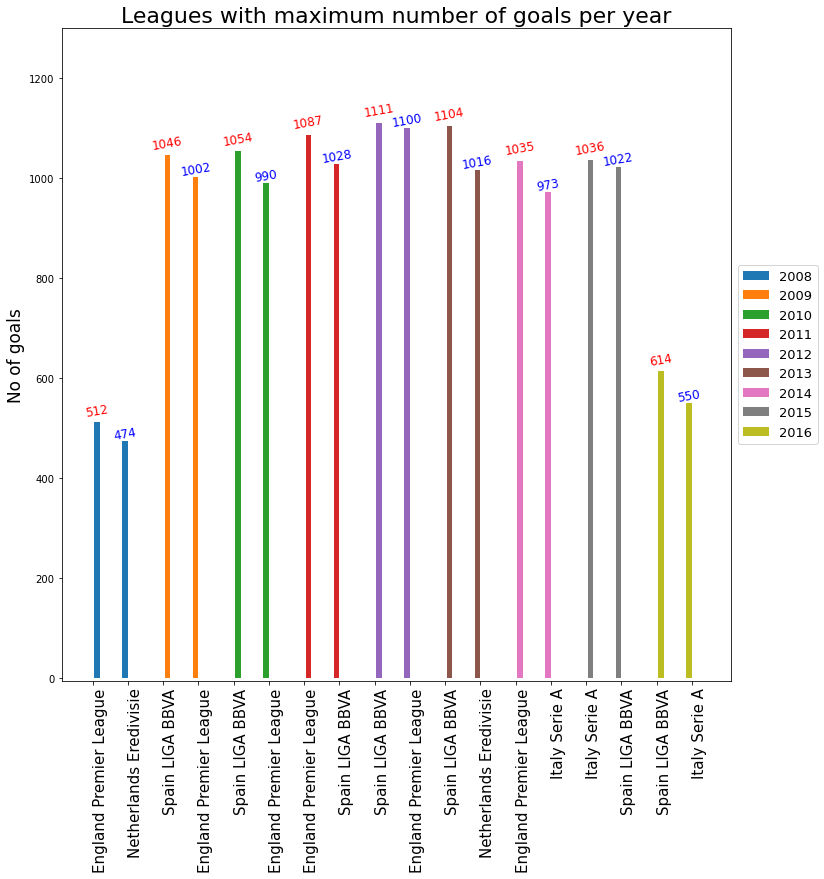

In [612]:
leagus_total_goals = Match_League_Country.groupby(['Year', 'league_name']).sum()
df = {}
years = np.arange(2008, 2017)

# making a dicitonary saves the most 2 leagues has goals in each ear.
for i in range(len(years)):
    df[years[i]] = leagus_total_goals.query(f'Year == {years[i]}')['Total_goals'].nlargest(2)



fig, ax = plt.subplots(figsize=(12, 12))
x = 0
# plotting bars
for year in years:
    plt.bar(np.arange(0, 8, 4) + x ,df[year].values)
    
    # typing each maximum goal for each league
    plt.text(0 + x, df[year].values[0] + 7 , df[year].values[0], ha='center', va='bottom' , fontsize=12,  color='r', rotation='10')
    plt.text(4 + x, df[year].values[1] - 2  ,df[year].values[1], ha='center', va='bottom',fontsize=12, color='b', rotation='10')

    # splitting betweeen the years
    x += 10


# getting the names of the leagues to use it in plt.xlabels of plt.set_xticks.
names = []
for i in range(len(years)):
    names.append(df[years[i]].index[0][1])
    names.append(df[years[i]].index[1][1])

# typing on the x-axis
ax.set_ylabel('No of goals', fontsize=17)
ax.set_title('Leagues with maximum number of goals per year', fontsize=22)
ax.set_xticks(np.arange(0, 180/2, 5) - 0.6  ,names, rotation=90,minor=False,ha='left', fontsize=15)

ax.legend()
plt.xlim(-5, 90)
plt.ylim(-5, 1300)
plt.legend(np.arange(2008, 2017), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})


> ##### We note that the 3 most popular leagues in the list of the most scoring leagues are
> 1. **Spain LIGA BBVA.**
> 2. **England Premier League.**
> 3. Italy Serie A.

> ##### This explains why the Spanish and English leagues are the most watched in the world.

> ##### But to be fair, the number of matches varies from one league to another, so let's calculate the **average goals per match** in the leagues over the years:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{2008: Year  league_name           
2008  Netherlands Eredivisie    3.098039
      Germany 1. Bundesliga     3.019608
Name: Total_goals, dtype: float64, 2009: Year  league_name             
2009  Switzerland Super League    3.262295
      Spain LIGA BBVA             2.827027
Name: Total_goals, dtype: float64, 2010: Year  league_name             
2010  Switzerland Super League    3.188889
      Germany 1. Bundesliga       3.032680
Name: Total_goals, dtype: float64, 2011: Year  league_name           
2011  Netherlands Eredivisie    3.287671
      England Premier League    2.883289
Name: Total_goals, dtype: float64, 2012: Year  league_name           
2012  Netherlands Eredivisie    3.171429
      Belgium Jupiler League    3.045455
Name: Total_goals, dtype: float64, 2013: Year  league_name           
2013  Netherlands Eredivisie    3.320261
      Germany 1. Bundesliga     3.081967
Name: Total_goals, dtype: float64, 2014: Year  league_name           
2014  Netherlands Eredivisie    3.060606

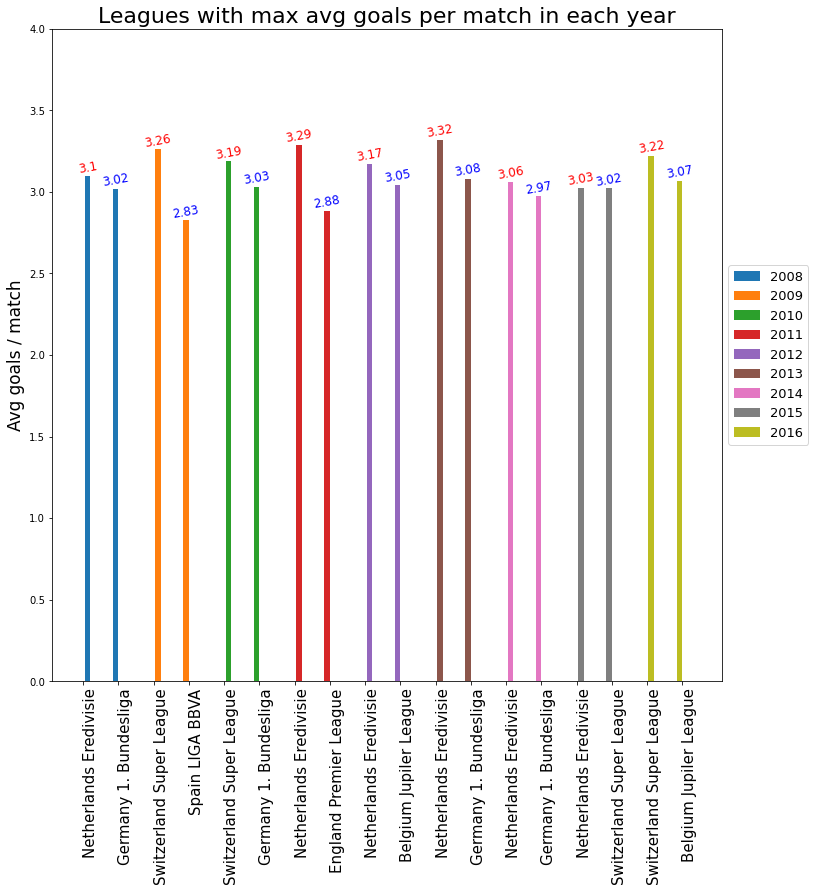

In [615]:
leagus_avg_goals = Match_League_Country.groupby(['Year', 'league_name']).mean()
df = {}
years = np.arange(2008, 2017)

# making a dicitonary saves the most 2 leagues has goals in each ear.
for i in range(len(years)):
    df[years[i]] = leagus_avg_goals.query(f'Year == {years[i]}')['Total_goals'].nlargest(2)


print(df)

fig, ax = plt.subplots(figsize=(12, 12))
x = 0
# plotting bars
for year in years:
    plt.bar(np.arange(0, 8, 4) + x ,df[year].values)
    
    # typing each maximum goal for each league
    plt.text(0 + x, df[year].values[0] , round(df[year].values[0], 2), ha='center', va='bottom' , fontsize=12,  color='r', rotation='10')
    plt.text(4 + x, df[year].values[1] , round(df[year].values[1], 2), ha='center', va='bottom',fontsize=12, color='b', rotation='10')

    # splitting betweeen the years
    x += 10


# getting the names of the leagues to use it in plt.xlabels of plt.set_xticks.
names = []
for i in range(len(years)):
    names.append(df[years[i]].index[0][1])
    names.append(df[years[i]].index[1][1])

# typing on the x-axis
ax.set_ylabel('Avg goals / match', fontsize=17)
ax.set_title('Leagues with max avg goals per match in each year', fontsize=22)
ax.set_xticks(np.arange(0, 180/2, 5) - 0.6  ,names, rotation=90,minor=False,ha='left', fontsize=15)

ax.legend()
plt.xlim(-5, 90)
plt.ylim(0, 4)
plt.legend(np.arange(2008, 2017), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})


> ### As we expected, the number of matches varies from one league to another, and this shows that the leagues that have the highest average number of goals in each match are:
> 1. **Netherlands Eredivisie.**
> 2. **Switzerland Super League.**
> 3. Germany 1. Bundesliga.
>


### 2) During [2010 - 2012 - 2015] , how has the level of defense of the teams changed?

C:\Users\zmlka\anaconda3\envs\Udacity\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


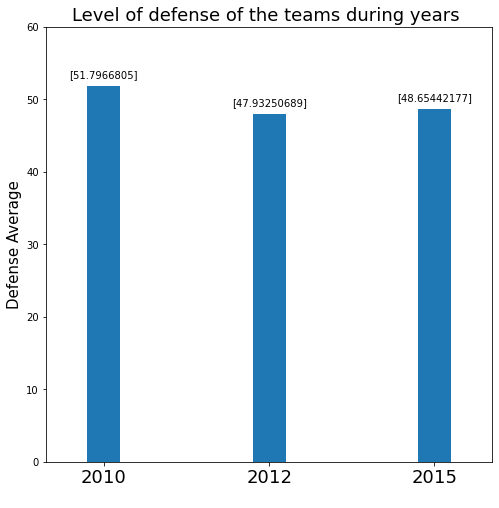

In [575]:
Defence_data = TeamData.query('Year in [2010, 2012, 2015]').groupby('Year').mean()[['defencePressure', 'defenceAggression', 'defenceTeamWidth']]
Defence_data['total defense avg'] = (Defence_data['defencePressure'] + Defence_data['defenceAggression'] + Defence_data['defenceTeamWidth']) / 3
Defence_data.drop(columns=['defencePressure', 'defenceAggression', 'defenceTeamWidth'], inplace=True)

Defence_data.plot.bar(figsize=(8, 8), width=0.2)

axs.bar(Defence_data.index, Defence_data.values[0])
plt.ylabel("Defense Average", fontsize=15)
plt.xlabel(' ')
plt.xticks(fontsize=18, rotation='360')
plt.title('Level of defense of the teams during years ', fontsize=18)
plt.ylim(0, 60)
for i in range(3):
    plt.text(i , Defence_data.values[i]+.9 , Defence_data.values[i] , ha='center', va='bottom', fontsize = 10 )
    
plt.legend(' ').remove()


During 2010, the teams paid attention to defense in a very big way, so the quality of defense yachts was high, reaching 51.796680.\
Then the interest decreased in 2012, and the quality of defense decreased with it until it increased again in 2015.

### 3) What helps teams to win? In other words, what distinguishes the best teams in [2010 - 2012 - 2015]?

In [ ]:
v = []

temp = list(Match_League_Country.query('Year in [2010, 2012, 2015]').query('home_team_goal > away_team_goal')['home_team_api_id'].values)  # get winners in home matches.

temp2 = list((Match_League_Country.query('Year in [2010, 2012, 2015]').query('home_team_goal < away_team_goal')['away_team_api_id']))      # get winners in away matches.

for i in temp:
    v.append(i)

for i in temp2:
    v.append(i)
    
# building a dictionary of thease teams ids and their count of vectories:
vectory = {}
for team in v:
    vectory[team] = vectory.get(team, 0) + 1
    
Vec = pd.DataFrame({'wins': vectory})

Best_10 = Vec['wins'].nlargest(10)


In [ ]:
Best_10_Data = TeamData.query('Year in [2010, 2012, 2015]')[TeamData['team_api_id'].isin(Best_10.index)]
Best_10_Data.mean()[['chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression']]

In [ ]:
att = ['chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression']

best_teams = Best_10_Data[att].mean()     # Data of the best teams during 2010 - 2012 - 2012
all_teams = TeamData.query('Year in [2010, 2012, 2015]')[att].mean()   # Data of all teams during 2010 - 2012 - 2015
ide = np.arange(0, 35, 7)

plt.rcParams["figure.figsize"] = (10,10)
plt.bar(ide, best_teams, width=1.2)
plt.bar(ide+1.2, all_teams, width=1.2)
plt.xticks(ide, att, rotation=390, fontsize=12)
plt.ylabel('Mean Value', fontsize=18)
plt.title('Advantages of Best teams', fontsize=20)
plt.legend(['Best Teams', 'All Teams'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


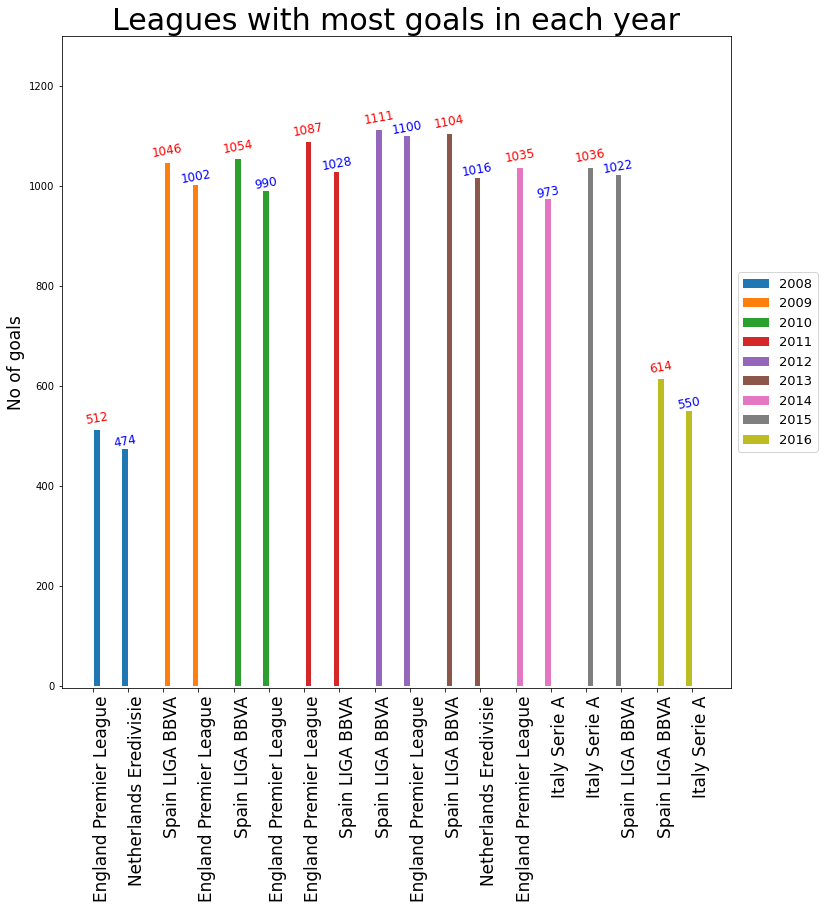

In [573]:
leagus_total_goals = Match_League_Country.groupby(['Year', 'league_name']).sum()
df = {}
years = np.arange(2008, 2017)

# making a dicitonary saves the most 2 leagues has goals in each ear.
for i in range(len(years)):
    df[years[i]] = leagus_total_goals.query(f'Year == {years[i]}')['Total_goals'].nlargest(2)



fig, ax = plt.subplots(figsize=(12, 12))
x = 0
# plotting bars
for year in years:
    plt.bar(np.arange(0, 8, 4) + x ,df[year].values)
    
    # typing each maximum goal for each league
    plt.text(0 + x, df[year].values[0] + 7 , df[year].values[0], ha='center', va='bottom' , fontsize=12,  color='r', rotation='10')
    plt.text(4 + x, df[year].values[1] - 2  ,df[year].values[1], ha='center', va='bottom',fontsize=12, color='b', rotation='10')

    # splitting betweeen the years
    x += 10


# getting the names of the leagues to use it in plt.xlabels of plt.set_xticks.
names = []
for i in range(len(years)):
    names.append(df[years[i]].index[0][1])
    names.append(df[years[i]].index[1][1])

# typing on the x-axis
ax.set_ylabel('No of goals', fontsize=17)
ax.set_title('Leagues with most goals in each year', fontsize=30)
ax.set_xticks(np.arange(0, 180/2, 5) - 0.6  ,names, rotation=90,minor=False,ha='left', fontsize=17)

ax.legend()
plt.xlim(-5, 90)
plt.ylim(-5, 1300)
plt.legend(np.arange(2008, 2017), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})


AttributeError: 'Rectangle' object has no property 'trck_label'

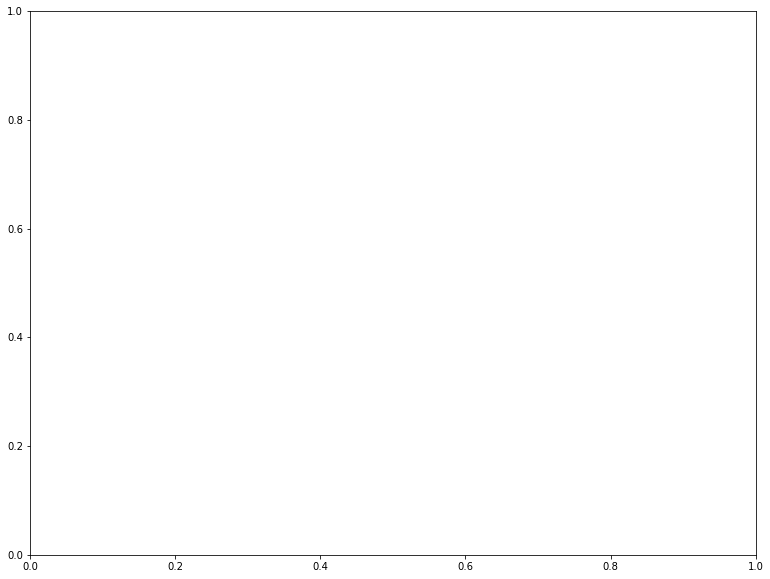

In [468]:

Match_League_Country.head()
goal_10= Match_League_Country.query('Year == 2008')
pro10 = goal_10.groupby(['league_name']).mean()['Total_goals'].nlargest(3)

goal_12 = Match_League_Country.query('Year == 2012')
pro12 = goal_12.groupby(['league_name']).mean()['Total_goals'].nlargest(3)

goal_15 = Match_League_Country.query('Year == 2015')
pro15 = goal_15.groupby(['league_name']).mean()['Total_goals'].nlargest(3)



Hello = Match_League_Country.groupby(['Year', 'league_name']).sum()
df = {}
years = np.arange(2008, 2017)
years
for i in range(len(years)):
    # df.append(Hello.query(f'Year == {Hello.index[i][0]} and league_name == {Hello.index[i][1]}'))
    df[years[i]] = Hello.query(f'Year == {years[i]}')['Total_goals'].nlargest(3)
    
labels = [df[2008].index[0][1], df[2008].index[1][1], df[2008].index[2][1]]
plt.bar(np.arange(3),df[2008], trck_label=labels)






# ind = np.arange(0, 9, 3)
# f, axs = plt.subplots(1, 1,figsize=(10,10))
# axs.margins(0.3)
# axs.set_ylabel('Avg goals per match', fontsize=20)
# plt.title(' Leagues With Most Goals', fontsize=25)
# plt.yticks(fontsize=14)
# plt.xlim(-5, 60)

# witdt = 0.3
# for year, leagues in Hello.items():
#     plt.bar(ind ,leagues.values,  width=0.8, align='center')
# P10 = plt.bar(ind ,pro10.values,  width=0.8, align='center')

# P12 = plt.bar(ind + 19, pro12.values,  width=1, align='center')

# P15 = plt.bar(ind + 38, pro15.values,  width=1, align='center')

# # to type above the bars
# for i in range(3):
#     if i == 1:
#         plt.text(i * 3 + 8, pro10.values[i]+0.06, '(' + pro10.index[i]+ ' , ' +str(round(pro10.values[i], 3)) + ' ) ', ha='center', va='bottom', rotation='30')
#     else:
#         plt.text(i * 3 + 8, pro10.values[i], '(' + pro10.index[i] + ' , ' +str(round(pro10.values[i], 3)) + ' ) ', ha='center', va='bottom', rotation='30')
        
        
# for i in range(3):
#     plt.text(i * 3 + 28, pro12.values[i]+.01 , '(' + pro12.index[i] + ' , ' + str(round(pro12.values[i], 3)) + ' ) ' , ha='center', va='bottom', rotation='30')


# for i in range(3):
#     if i == 1:
#         plt.text(i * 3 + 47, pro15.values[i], '(' +  pro15.index[i]+ ' , ' +str(round(pro15.values[i], 3)) + ' ) ' , ha='center', va='bottom', rotation='30')
#     else:
#         plt.text(i * 3 + 46, pro15.values[i] + 0.05, '(' +  pro15.index[i]+ ' , ' +str(round(pro15.values[i], 3)) + ' ) ' , ha='center', va='bottom', rotation='32')
# plt.legend(['2010','2012','2015'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})
# plt.xticks([3, 22, 41], [2010, 2012, 2015], rotation=390, fontsize=12)


> We notice that good tams give more attention to:
> 1. Creation of passing.
> 2. Creation of crossing.
> 3. Shotting.
> 4. Having a good defence pressure.


### 4) Who are the best players of each year?

In [ ]:
Hello = PlayerData.groupby('Year')['overall_rating'].max()
df = []

for i in range(len(Hello)):
    df.append(PlayerData.query(f'Year == {Hello.index[i]} and overall_rating == {Hello.values[i]}'))

plt.rcParams["figure.figsize"] = (13,10)

plt.bar([3], df[0].overall_rating, width=0.5)
plt.bar([7.5], df[1].overall_rating, width=0.5)
plt.bar([12], df[2].overall_rating, width=0.5)
plt.bar([16.5], df[4].overall_rating, width=0.5)
plt.bar([21], df[9].overall_rating, width=0.5)



plt.text(3 , df[0].overall_rating.iloc[0] + 0.5, '(' + str(int(df[0].overall_rating.iloc[0]))+ ' , ' + df[0].player_name.iloc[0] + ',' + '\n' + df[0].player_name.iloc[1] + ')' , ha='center', va='bottom', fontsize = 12, rotation='-15')
plt.text(8, df[1].overall_rating.iloc[0] + 0.5, '(' + str(int(df[1].overall_rating.iloc[0]))+ ' , ' + df[1].player_name.iloc[0] + ',' +'\n' + df[1].player_name.iloc[1] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )
plt.text(12.5 , df[2].overall_rating.iloc[0] + 0.5, '(' + str(int(df[2].overall_rating.iloc[0]))+ ' , ' + df[2].player_name.iloc[0] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )
plt.text(16.5, df[4].overall_rating.iloc[0] + 0.5, '(' + str(int(df[4].overall_rating.iloc[0]))+ ' , ' + df[4].player_name.iloc[0] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )
plt.text(21, df[9].overall_rating.iloc[0] + 0.5, '(' + str(int(df[9].overall_rating.iloc[0]))+ ' , ' + df[9].player_name.iloc[0] + ',' + '\n' + df[9].player_name.iloc[3] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )

plt.xlim(0, 25)
plt.ylim(0, 110)
plt.xticks([3, 7.5, 12, 16.5, 21], ['2007', '2008', '2009', '2010 : 2015', '2016'], rotation=390, fontsize=12)
plt.ylabel('Overal Rating', fontsize=18)
plt.title('Best players in each year', fontsize=20)


We noticed that Lionel Messi is the most player that has maximum overal rank all over the years .. as he has the maximum\
    rank in 2010 - 2011 - 2012 - 2013 - 2014 - 2015

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!